# Connectionism
In this assignment, you will implement a connectionist model of memory storage and retrieval. Before starting work on the assigment, you should read the following paper:

- McClelland, J. L. (1981). Retrieving general and specific knowledge from stored knowledge of specifics. *Proceedings of the Third Annual Conference of the Cognitive Science Society,* 170-172. [[link]](https://stanford.edu/~jlmcc/papers/McClelland81.pdf)

Note that all example images in this Colab notebook are just that: example images. Your data can lead to different figures and conclusions than the data used to create these examples.

<figure>
<img src="https://web.stanford.edu/group/pdplab/pdphandbook/jetsdiagram.png" alt="Frequency plot" width=400>
</figure>



In [185]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part 1. Preparing your data and setting up the network

The dataset listed in the paper consists of 27 gang members with each 6 attributes:


1.   Name (27 unique names)
2.   Gang (2 gangs)
3.   Age (3 age brackets)
4.   Education level (3 education levels)
5.   Marital status (3 marital statuses)
6.   Occupation (3 occupations)

This means that the total number of nodes in our network is $27+27+2+3+3+3+3=68$. Nodes are either excitatory or inhibitory connected to each other. We know from the paper that nodes *within* an attribute inhibit each other. Using a $68 \times 68$ matrix we can encode the complete dataset. To save you time, we are providing a binary matrix as a CSV file, indicating whether or not there is an *excitatory* connection between two nodes.

### Assignment 1.1
Load the data and take a look at its contents. The input is represented as a matrix of size $68 \times 68$. Note that [name]-name refers to a property node, while [name] refers to an instance node.

### Assignment 1.2
Now you will need to represent inhibitory connections between property nodes. Think about your design choices.




In [300]:
!wget -qO dataset.csv https://surfdrive.surf.nl/files/index.php/s/vxOY3pFjSnP5KoQ/download

# your code here
df = pd.read_csv("dataset.csv", index_col=0)

# use [name]-name



def get_all_nodes_groups(df):
  all_nodes = df.index.tolist()
  name_property_nodes = [node for node in all_nodes if "-name" in node]
  instance_nodes = [node.replace("-name", "") for node in name_property_nodes]


  candidate_property_nodes = [
      node for node in all_nodes
      if node not in instance_nodes and node not in name_property_nodes
  ]
  visited = set()
  confirmed_cohorts = [name_property_nodes]


  for i in range(len(candidate_property_nodes)):
      if candidate_property_nodes[i] in visited:
          continue
      current_group = [candidate_property_nodes[i]]

      for j in range(i+1, len(candidate_property_nodes)):
          if candidate_property_nodes[j] in visited:
              continue

          # check there is a inhibitory connections between property nodes
          compare_df = df.loc[instance_nodes, current_group + [candidate_property_nodes[j]]]
          row_sums = compare_df.sum(axis=1)
          if (row_sums <= 1).all() and (row_sums >= 1).any():
              current_group.append(candidate_property_nodes[j])
              visited.add(candidate_property_nodes[j])

      if len(current_group) >= 2:
          confirmed_cohorts.append(current_group)
          visited.update(current_group)

  return instance_nodes, name_property_nodes, candidate_property_nodes, confirmed_cohorts


instance_nodes, property_nodes, non_name_property_nodes, inhibitory_groups = get_all_nodes_groups(df)
for group in inhibitory_groups:
    print(group)

def set_inhibitory_connections(df):
  instance_nodes, property_nodes, non_name_property_nodes, inhibitory_groups = get_all_nodes_groups(df)
  connections = df.to_numpy()
  node_names = df.index.tolist()
  name_to_index = {name: i for i, name in enumerate(node_names)}
  # print(name_to_index)
  index_names = [name_to_index[name] for name in instance_nodes]
  index_non_name_property = [name_to_index[name] for name in non_name_property_nodes]
  index_property = [name_to_index[name] for name in property_nodes]
  for x in range(len(connections)):
    if x in index_names:
      for group in inhibitory_groups:
        idxs = [name_to_index[n] for n in group]
        for index in idxs:
          if connections[x][index] == 0: connections[x][index] = -1
    elif x in index_non_name_property:
      idxs = [name_to_index[n] for n in instance_nodes]
      for index in idxs:
        if connections[x][index] == 0: connections[x][index] = -1
  for group in inhibitory_groups:
    idxs = [name_to_index[name] for name in group if name in name_to_index]
    for i in idxs:
      for j in idxs:
        if i != j and connections[i][j] == 0:
          connections[i][j] = -1
  return connections
connections = set_inhibitory_connections(df)
print(connections)

['Art-name', 'Al-name', 'Sam-name', 'Clyde-name', 'Mike-name', 'Jim-name', 'Greg-name', 'John-name', 'Doug-name', 'Lance-name', 'George-name', 'Pete-name', 'Fred-name', 'Gene-name', 'Ralph-name', 'Phil-name', 'Ike-name', 'Nick-name', 'Don-name', 'Ned-name', 'Karl-name', 'Ken-name', 'Earl-name', 'Rick-name', 'Ol-name', 'Neal-name', 'Dave-name']
['Jets', 'Sharks']
['20s', '30s', '40s']
['JH', 'HS', 'COL']
['Single', 'Married', 'Divorced']
['Bookie', 'Burglar', 'Pusher']
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 -1 -1 -1  1
   1 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 -1 -1  1 -1
   1 -1 -1 -1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 -1  1 -1 -1
  -1 -1

### Assignment 1.3
It is now time to implement the network as a class named `IACModel`. The class should contain two methods `update_activations()` and `run()` in addition to its special method `__init__()`. You do not yet have to implement the two methods, you will do that later, but you do have to implement `__init__()`. What would you put in there?


In [296]:
# your code below

class IACModel:
    def __init__(self, dataset_file, D=0.05, R=0.1, E=0.05, I=0.03, M=1.0, m=-0.2):
      self.df = dataset_file
      self.D = D
      self.R = R
      self.E = E
      self.I = I
      self.M = M
      self.m = m
      self.node_names = self.df.index.tolist()
      self.n_nodes = len(self.node_names)
      self.connections = set_inhibitory_connections(df)
      self.activations = np.zeros(self.n_nodes)
      self.name_to_index = {name: i for i, name in enumerate(self.node_names)}


    def update_activations():
      pass

    def run():
      pass


## Part 2. System dynamics

The *dynamics* of a system refer to its changes in state over time. Each node's activation depends on the activations of the nodes that are connected to it through excitatory and inhibitory connections.

But this is not all. A node's activation *decays* over time, according to $D(a_i(t)-R)$ with decay parameter $D$ and resting value $R$. Let's look at how this works.

### Assignment 2.1

Assume $D=0.05$ and $R=0.1$. Start by implementing a node with activation $A = 0.1$ at time $t=0$. Have the node's activation decay according to the above definition. At time $t=5$ you will excite the node by setting its activation to $0.9$. Run 100 timesteps, then plot the activation over time. This should look something like:


<figure>
<img src="https://surfdrive.surf.nl/files/index.php/s/PCFawx2t62kCzkL/download" alt="Frequency plot" width=400>
</figure>



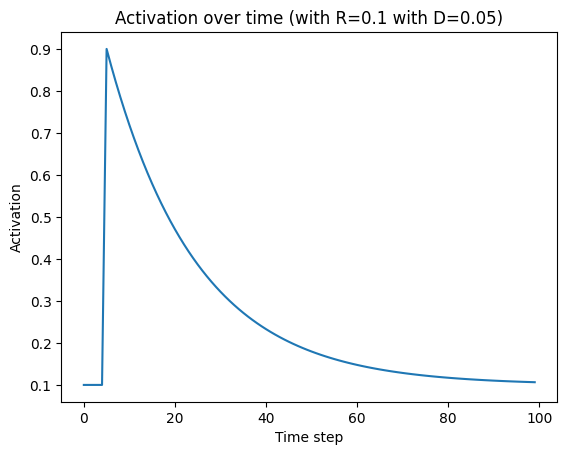

In [297]:
R = 0.1
D = 0.05
# your code below

timesteps = 100
activation = 0.1 # initialactivation = 0.1 at t = 0

activation_history = []

for t in range(timesteps):
  if t == 5:
    activation = 0.9
  activation_history.append(activation)
  activation += (activation - R) * (-D)

plt.plot(activation_history)
plt.title("Activation over time (with R=0.1 with D=0.05)")
plt.xlabel("Time step")
plt.ylabel("Activation")
plt.show()


So this is how one node's activation changes over time. Now let's implement our `update_activations()` and `run()` methods to reflect the dynamics described in the paper.

Let's take a look at the paper. Specifically, the net input to node $i$ at time $t$ is given by:

$\textit{input}{_i}(t) = p_i(t) + E\displaystyle\sum_je_{ij}(t) - I\displaystyle\sum_ji_{ij}(t)$

with all necessary symbols explained in the paper (p. 171). In short, the input is determined by (1) the external input going into the system by means of a probe, and (2) the activation of a node's connected neighbors.

Then, once we know $\textit{input}{_i}(t)$, we can calculate $\textit{effect}{_i}(t)$ using this definition from the paper:

<figure>
<img src="https://surfdrive.surf.nl/files/index.php/s/WSFamjOWq6cdU7n/download" alt="Frequency plot" width=600>
</figure>

Finally, we update the activations of our nodes using:

<figure>
<img src="https://surfdrive.surf.nl/files/index.php/s/1RTgbNittDuk46h/download" alt="Frequency plot" width=400>
</figure>

Now you have all the information (together with the paper) to implement the `update_activations()` method in your class. The only thing the `run()` method needs to do is to loop over timesteps (let's say 500) and iteratively call the `update_activations()` method. Implement both.

In [298]:
import numpy as np

class IACModel:
    def __init__(self, dataset_file, D=0.05, R=0.1, E=0.05, I=0.03, M=1.0, m=-0.2):
      self.df = dataset_file
      self.D = D
      self.R = R
      self.E = E
      self.I = I
      self.M = M
      self.m = m
      self.node_names = self.df.index.tolist()
      self.n_nodes = len(self.node_names)
      self.connections = set_inhibitory_connections(df)
      self.activations = np.zeros(self.n_nodes)
      self.name_to_index = {name: i for i, name in enumerate(self.node_names)}

    def update_activations(self, probe_input=None):
        net_input = np.zeros(self.n_nodes)
        p = np.zeros(self.n_nodes)
        if probe_input is not None:
          for node, value in probe_input.items():
            idx = self.name_to_index.get(node, -1)
            if idx != -1:
              p[idx] += value
        # pretty_print_array(self.activations, label="Activations")
        exc_mask = (self.connections == 1).astype(float)
        exc_input = self.E * (exc_mask @ self.activations)
        inh_mask = (self.connections == -1).astype(float)
        inh_input = self.I * (inh_mask @ self.activations)
        net_input = p + exc_input - inh_input
        effect = np.where(
            net_input >= 0,
            (self.M - self.activations) * net_input,
            (self.activations - self.m) * net_input
        )
        self.activations += effect - self.D * (self.activations - self.R)

    def run(self, timesteps, probe_input=None):
        history = []

        for t in range(timesteps):
          # print(f"timesteps :{t}")
          current_probe = None
          if t == 0:
            current_probe = probe_input
          self.update_activations(current_probe)
          history.append(self.activations.copy())
        return history


In [315]:
instance_nodes, name_property_nodes, non_name_property_nodes, inhibitory_groups = get_all_nodes_groups(df)
property_nodes = name_property_nodes + non_name_property_nodes
def plot_activations(
    df,
    probe_input,
    nodes_type="property",  # choice: "property", "non_name_property", "instance"
    title="Node Activations",
    timesteps=500,
    figsize=(12, 5),
):
    iac = IACModel(df)
    history = iac.run(timesteps=timesteps, probe_input=probe_input)
    final = history[-1]

    if nodes_type == "property":
        target_nodes = property_nodes
    elif nodes_type == "non_name_property":
        target_nodes = non_name_property_nodes
    elif nodes_type == "instance":
        target_nodes = instance_nodes
    else:
        raise ValueError("nodes_type must be 'property', 'non_name_property' or 'instance'")

    idxs = [iac.name_to_index[n] for n in target_nodes if n in iac.name_to_index]
    names = [iac.node_names[i] for i in idxs]
    acts = final[idxs]

    plt.figure(figsize=figsize)
    plt.bar(names, acts)
    plt.xticks(rotation=90)
    plt.ylabel("Activation")
    plt.title(title)
    plt.tight_layout()
    plt.show()

def pretty_print_array(arr, label="Array", precision=3, per_line=10):
    print(f"\n🔹 {label} (length = {len(arr)})")
    for i in range(0, len(arr), per_line):
        row = arr[i:i+per_line]
        formatted = ["{:.{p}f}".format(x, p=precision) for x in row]
        print("  ", formatted)

## Part 3. Probing the network and getting information out

For this part, you will create bar graphs of activations. For example, the figure below:


<figure>
<img src="https://surfdrive.surf.nl/files/index.php/s/srMB2wDLzywFo1S/download" alt="Frequency plot" width=400>
</figure>

Let's now take a look at the paper (p. 171) under Examples of the model's behavior.

Probe the network with *Jets*, similar to the paper. Make a figure of the activations of all the property nodes after 500 timesteps.

Now probe the property node of the name *George*. Make a figure of all non-name property nodes.

Finally, probe *Age 20s* and *JH*, similar to the paper. Make a figure showing the activations of the instance nodes.



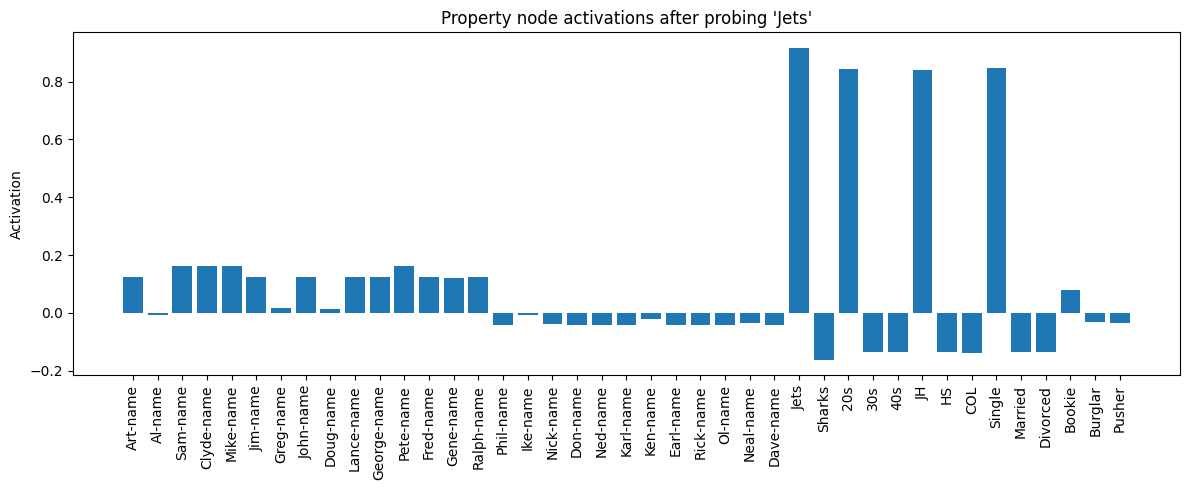

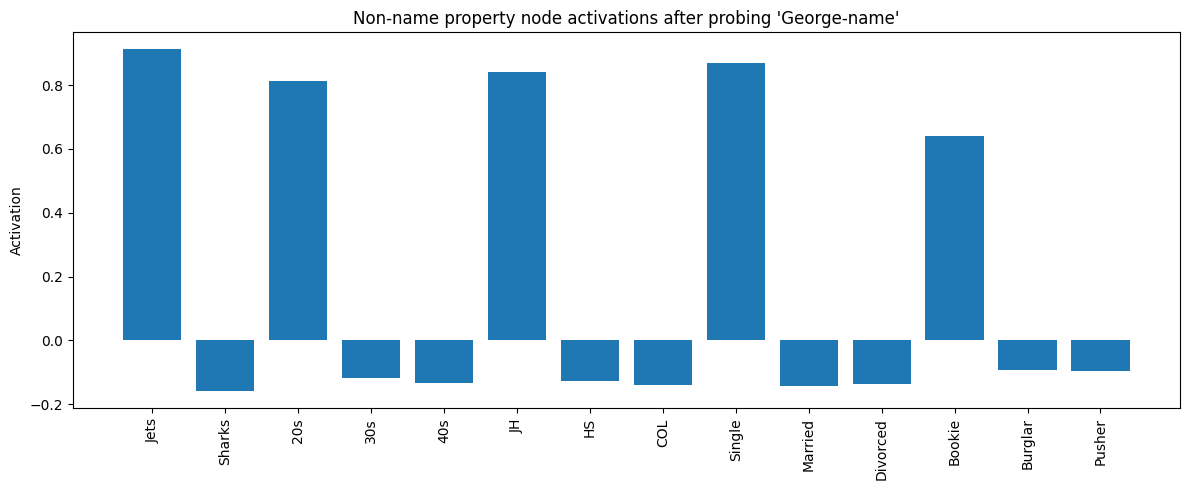

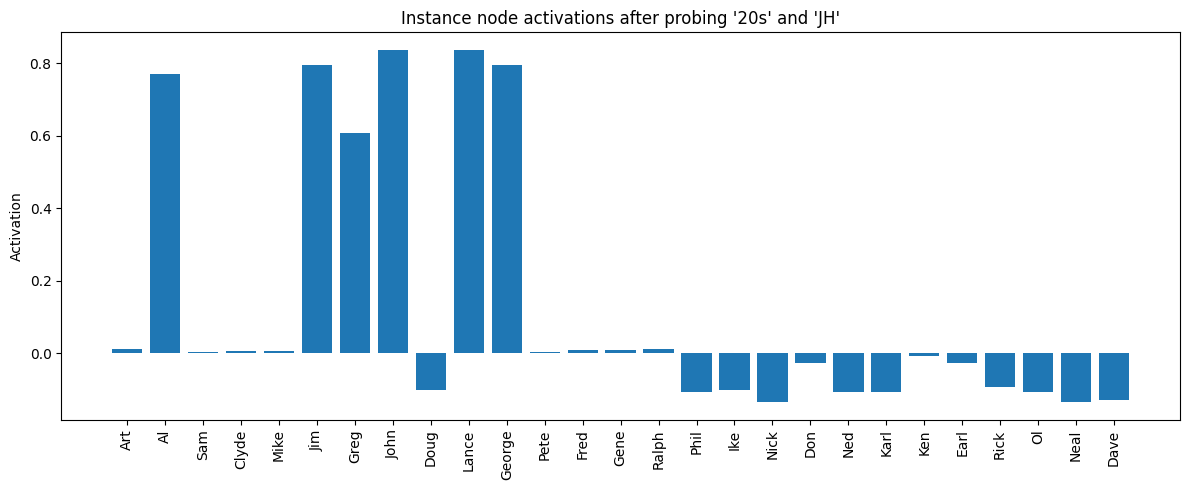

In [320]:
plot_activations(
    df,
    probe_input={"Jets": 0.2},
    nodes_type="property",
    title="Property node activations after probing 'Jets'"
)

plot_activations(
    df,
    probe_input={"George-name": 0.2},
    nodes_type="non_name_property",
    title="Non-name property node activations after probing 'George-name'"
)

plot_activations(
    df,
    probe_input={"20s": 0.2, "JH": 0.2},
    nodes_type="instance",
    title="Instance node activations after probing '20s' and 'JH'"
)

## Conclusion
Well done! You have implemented McClellands original IAC network, the (re-)birth of connectionism and artificial neural networks!